Numerical Methods Homework 4, due 10/25/22

Kerry Hall

In [1]:
import numpy as np
from numpy import array as ar
import matplotlib.pyplot as plt
from statistics import mean

In [2]:
#Written this way for readability.
def RMSE(B, A, x, decimalplaces=4):
    e_vec = B - A@x
    e_vec_square = e_vec**2
    e_vec_square_mean = mean(e_vec_square)
    e_vec_square_mean_root = np.sqrt(e_vec_square_mean)
    e_vec_square_mean_root_round = np.round(e_vec_square_mean_root, decimalplaces)
    return e_vec_square_mean_root_round

In [3]:
a_1 = ar([[ 3, -1, 2,],
          [ 4,  1, 0,],
          [-3,  2, 1,],
          [ 1,  1, 5,],
          [-2,  0, 3,],], dtype=float)
b_1 = ar([10, 10, -5, 15, 0], dtype=float)
x_1 = np.linalg.inv(a_1.T@a_1)@(a_1.T@b_1)
print(f"The best solution vector is: {np.round(x_1,3)}.\n\nThe root mean square error is: {RMSE(b_1, a_1, x_1)}.")

The best solution vector is: [2.525 0.662 2.093].

The root mean square error is: 1.0793.


In [4]:
a_2 = ar([[ 4, 2,  3,  0,],
          [-2, 3, -1,  1,],
          [ 1, 3, -4,  2,],
          [ 1, 0,  1, -1,],
          [ 3, 1,  3, -2,],], dtype=float)
b_2 = ar([10, 0, 2, 0, 5,])
x_2 = np.linalg.inv(a_2.T@a_2)@(a_2.T@b_2)
print(f"The best solution vector is: {np.round(x_2,3)}.\n\nThe root mean square error is: {RMSE(b_2, a_2, x_2)}.")

The best solution vector is: [1.274 0.689 1.212 1.75 ].

The root mean square error is: 0.3692.




The RMSE for function A is: 228.9

The RMSE for function B is: 228.4
 
The RMSE for function C is: 207.3

Based on the calculated error, curve C is the best model.




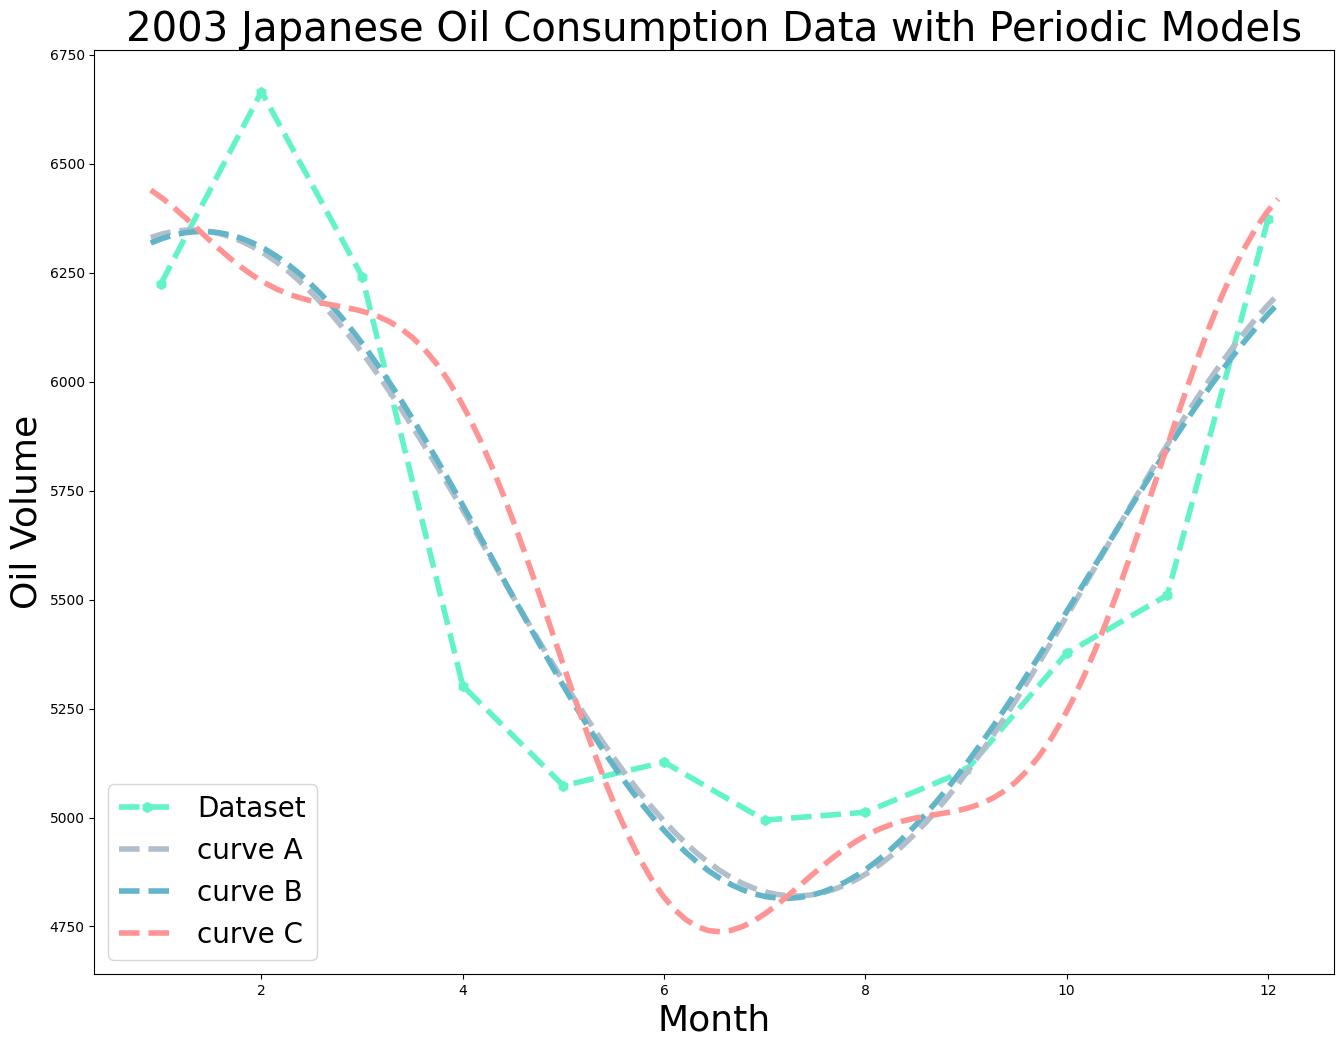

In [5]:
oil_consumption_03_dict = {
    1  :6224, 
    2  :6665,
    3  :6241,
    4  :5302,
    5  :5073,
    6  :5127,
    7  :4994,
    8  :5012,
    9  :5108,
    10 :5377,
    11 :5510,
    12 :6372,
}

def model_funca(x, mat, angular_velocity=2*np.pi/len(oil_consumption_03_dict)):
    
    return mat[0] + mat[1]*np.sin(angular_velocity*x) + mat[2]*np.cos(angular_velocity*x)

def model_funcb(x, mat, angular_velocity=2*np.pi/len(oil_consumption_03_dict)): 
    
    return mat[0] + mat[1]*np.sin(angular_velocity*x) + mat[2]*np.cos(angular_velocity*x) + mat[3]*np.cos(2*angular_velocity*x)

#I make a third and slightly better model because I don't like the other two. 
#funca and funcb are too similar, the 4th term has relatively no impact on funcb and thus they look basically the same.
def model_funcc(x, mat, angular_velocity=2*np.pi/len(oil_consumption_03_dict)): 
    
    return mat[0] + mat[1]*np.sin(angular_velocity*x) + mat[2]*np.cos(angular_velocity*x) + mat[3]*np.cos(2*angular_velocity*x) + mat[4]*np.cos(3*angular_velocity*x)

#The below arrays were generated in a transposed form to use list comprehsions.
#This means that I will use the .T method in locations where the normal matrix would be used and use the original matrix where the .T would be used. 
oil_array_a = ar([[1 for each in oil_consumption_03_dict],
                  [np.sin(2*np.pi*each/len(oil_consumption_03_dict)) for each in oil_consumption_03_dict],
                  [np.cos(2*np.pi*each/len(oil_consumption_03_dict)) for each in oil_consumption_03_dict],], 
                 dtype=float)
oil_array_b = ar([[1 for each in oil_consumption_03_dict],
                  [np.sin(2*np.pi*each/len(oil_consumption_03_dict)) for each in oil_consumption_03_dict],
                  [np.cos(2*np.pi*each/len(oil_consumption_03_dict)) for each in oil_consumption_03_dict],
                  [np.cos(4*np.pi*each/len(oil_consumption_03_dict)) for each in oil_consumption_03_dict],],
                 dtype=float)
oil_array_c = ar([[1 for each in oil_consumption_03_dict], 
                  [np.sin(2*np.pi*each/len(oil_consumption_03_dict)) for each in oil_consumption_03_dict],
                  [np.cos(2*np.pi*each/len(oil_consumption_03_dict)) for each in oil_consumption_03_dict],
                  [np.cos(4*np.pi*each/len(oil_consumption_03_dict)) for each in oil_consumption_03_dict],
                  [np.cos(3*np.pi*each/len(oil_consumption_03_dict)) for each in oil_consumption_03_dict],],
                 dtype=float)

monthly_usage = ar([oil_consumption_03_dict.get(each) for each in oil_consumption_03_dict])
coeff_a = np.linalg.inv(oil_array_a@oil_array_a.T)@(oil_array_a@monthly_usage)
coeff_b = np.linalg.inv(oil_array_b@oil_array_b.T)@(oil_array_b@monthly_usage)
coeff_c = np.linalg.inv(oil_array_c@oil_array_c.T)@(oil_array_c@monthly_usage)
x = np.linspace(0.9, 12.1, 100)
fig, ax = plt.subplots(figsize=(16,12))

ax.plot(ar([int(each) for each in oil_consumption_03_dict]), oil_consumption_03_dict.values(), color="#62f4c8", marker='h', linestyle='dashed', linewidth=4, markersize=7, label="Dataset")
ax.plot(x, model_funca(x, coeff_a), color="#b2beca", linewidth=4, markersize=5, linestyle='dashed', label="curve A")
ax.plot(x, model_funcb(x, coeff_b), color="#62b4c8", linewidth=4, markersize=5, linestyle='dashed', label="curve B")
ax.plot(x, model_funcc(x, coeff_c), color="#FF9494", linewidth=4, markersize=5, linestyle='dashed', label="curve C")
print(f"\n\nThe RMSE for function A is: {RMSE(monthly_usage, oil_array_a.T, coeff_a, 1)}\n\nThe RMSE for function B is: {RMSE(monthly_usage, oil_array_b.T, coeff_b, 1)}\n",
      f"\nThe RMSE for function C is: {RMSE(monthly_usage, oil_array_c.T, coeff_c, 1)}\n\nBased on the calculated error, curve C is the best model.\n\n") 
plt.title("2003 Japanese Oil Consumption Data with Periodic Models", fontsize=29)
ax.set_ylabel("Oil Volume", fontsize=26)
ax.set_xlabel("Month", fontsize=26)
plt.legend(prop={'size': 20})
plt.show()

In [6]:
mat_1 = ar([[2, -2, 1,],
            [3, -6, 0,]], dtype=float).T
mat_2 = ar([[-4, -2,  4,],
            [-4,  7, -5,]], dtype=float).T
q1, r1 = np.linalg.qr(mat_1)
q2, r2 = np.linalg.qr(mat_2)
print(f"\nThe QR factorization of matrix 1 is:\n\nQ1 =\n{np.round(q1, 3)}\n\nR1 =\n{r1}")
print(f"\n\nThe QR factorization of matrix 2 is:\n\nQ2 =\n{np.round(q2, 3)}\n\nR2 =\n{r2}")


The QR factorization of matrix 1 is:

Q1 =
[[-0.667 -0.333]
 [ 0.667 -0.667]
 [-0.333 -0.667]]

R1 =
[[-3. -6.]
 [ 0.  3.]]


The QR factorization of matrix 2 is:

Q2 =
[[-0.667  0.667]
 [-0.333 -0.667]
 [ 0.667  0.333]]

R2 =
[[ 6. -3.]
 [ 0. -9.]]
